In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir('C:\\Users\\user1\\Desktop\\Brainihacks\\BrainiBeats')

In [ ]:
eegHappyAnita = pd.read_csv('C:\\Users\\user1\\Desktop\\Brainihacks\\BrainiBeats\\emotunz\\happyanita\\5.csv')
eegSadAnita = pd.read_csv('C:\\Users\\user1\\Desktop\\Brainihacks\\BrainiBeats\\emotunz\\sadanita\\5.csv')

eegHappyEthel = pd.read_csv('C:\\Users\\user1\\Desktop\\Brainihacks\\BrainiBeats\\emotunz\\happyethel\\5.csv')
eegSadEthel = pd.read_csv('C:\\Users\\user1\\Desktop\\Brainihacks\\BrainiBeats\\emotunz\\sadethel\\5.csv')


In [ ]:
eegHappyAnita.head(5)

In [5]:

eeg = eeg.rename(columns={'PO7': 'F3', 'PO8': 'F4'})
eeg

,Time,FZ,C3,CZ,C4,PZ,F3,OZ,F4,AccX,AccY,AccZ,Gyro1,Gyro2,Gyro3,Battery,Counter,Validation
0,23090.499892,220989.921875,228420.000000,684145.2500,335952.90625,-709067.0000,330315.78125,236733.687500,-708300.3750,-0.131592,0.988037,0.092285,-0.579834,2.502441,-0.122070,66.666672,1397863.0,1.0
1,23090.508641,221066.359375,228513.421875,684247.0000,336078.53125,-709059.1250,330419.25000,236816.468750,-708292.1250,-0.132080,0.986816,0.094482,-0.549316,2.532959,-0.061035,66.666672,1397864.0,1.0
2,23090.511601,220701.046875,228203.281250,683916.1250,335767.84375,-709068.5625,330169.06250,236491.390625,-708301.0000,-0.132812,0.983887,0.095703,-0.518799,2.624511,0.000000,66.666672,1397865.0,1.0
3,23090.511634,220472.343750,227949.453125,683623.9375,335463.75000,-709070.2500,329944.75000,236235.953125,-708302.5625,-0.133545,0.983887,0.092529,-0.549316,2.624511,-0.091553,66.666672,1397866.0,1.0
4,23090.522397,220839.812500,228253.968750,683944.1875,335760.59375,-709057.4375,330198.31250,236553.890625,-708289.8750,-0.135010,0.983887,0.092041,-0.335693,2.593994,-0.091553,66.666672,1397867.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23150.469051,220189.281250,227600.500000,683847.1875,308141.43750,-709142.5625,330013.34375,235812.968750,-708377.0000,-0.027344,0.995850,0.129639,-0.396728,1.922607,-0.946045,60.000000,1412858.0,1.0
14996,23150.469063,220183.109375,227526.015625,683728.5625,308010.53125,-709134.3125,329914.53125,235723.921875,-708368.7500,-0.027344,0.994385,0.129395,-0.427246,1.983642,-0.976562,60.000000,1412859.0,1.0
14997,23150.470942,220627.468750,227937.921875,684174.6875,308444.96875,-709118.2500,330278.59375,236169.531250,-708352.8125,-0.028564,0.992188,0.130615,-0.335693,1.983642,-0.915527,60.000000,1412860.0,1.0
14998,23150.479701,220708.109375,228064.968750,684342.1250,308612.96875,-709122.2500,330412.34375,236315.437500,-708357.0625,-0.029297,0.990234,0.128174,-0.244141,2.105713,-1.068115,60.000000,1412861.0,1.0


In [16]:
print(len(eeg['F3']))

15000


In [35]:
def FrontalAlphaAsymmetry(left, right):
    epochs = []
    lefthem = []
    righthem = []
    #sample freq = 250 Hz
    #8 seconds = 2000 samples per epoch
    count = 0
    for i in range(len(left)):
        
       
        lefthem.append(left[i])
        righthem.append(right[i])
        
        
        if count == 2000:
            FFTLefthem = np.fft.fft(lefthem).real
            FFTRighthem = np.fft.fft(righthem).real
            
            FFTLefthem = np.nanmean(FFTLefthem[8:12])
            #print(FFTLefthem)
            FFTRighthem = np.nanmean(FFTRighthem[8:12])
        
            FrontalAlpha = np.log10(abs(FFTRighthem) /abs(FFTLefthem))
            epochs.append(FrontalAlpha)
            count = 0
            lefthem = []
            righthem = []
        count += 1
        
        
        
    return epochs

anitaHappy = FrontalAlphaAsymmetry(eegHappyAnita['PO7'], eegHappyAnita['PO8'])

anitaSad = FrontalAlphaAsymmetry(eegSadAnita['PO7'], eegSadAnita['PO8'])

ethelHappy = FrontalAlphaAsymmetry(eegHappyEthel['PO7'], eegHappyEthel['PO8'])
ethelSad = FrontalAlphaAsymmetry(eegSadEthel['PO7'], eegSadEthel['PO8'])


[1.4595020459730619, 0.5611339363709968, 0.23316581161654995, 0.23053440522861116, 0.5786165643077805, 0.6522377216094589, 0.10437633670178612]


In [127]:
#Define Modes

ionian = [ "62", "64", "65", "67", "81", "83", "72"]  #Bright, Joyful, Stable
dorian = [ "62", "63" ,"65", "67", "81", "82", "72"] #Jazzy, Bluesy, Rocky, Thoughtful, Uncertain, Sophisticated
phrygian = [ "61" ,"63", "65", "67", "80", "82", "72"]  #Exotic, Latin, Lively, Dark, Mystic
lydian =  [ "62" , "64" , "66" , "67" ,"81" ,"83", "72"] # Hopeful, Dreamy, Heavenly, Yearning, Ethereal, Uplifting
mixolydian = ["62" , "64" , "65" , "67" , "81" , "82", "72"] #Positive, Bluesy, Rocky, Poppy, Searching 
aeolian = [ "62" , "63" , "65" , "67" , "80" , "82", "72"] #Sad, Melancholic, Romantic, Oppressive
locrian = [ "61" , "63" , "65" , "66" , "80" , "82", "72"] #Complex, Unstable, Exotic, Tense

scales = {'ionian' : ionian, 'dorian' : dorian, 'phrygian': phrygian, 
          'lydian': lydian, 'mixolydian':mixolydian, 'aeolian':aeolian,'locrian':locrian}
phase = 50

def getStep(num):
    step = 2/7
    return 1-num*step

def get_Scale(faa):
  
    if faa >= 0:
        return scales.get('ionian')

    else:
        return scales.get('aeolian')

 


meanFAA = np.mean(faa)
mode = get_Scale(meanFAA)
print(mode)
for i in range(8):
    print(getStep(i))

['62', '64', '65', '67', '81', '83', '72']
1.0
0.7142857142857143
0.4285714285714286
0.1428571428571429
-0.1428571428571428
-0.4285714285714284
-0.7142857142857142
-1.0


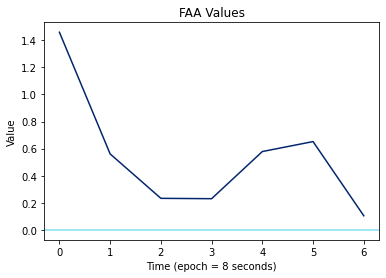

In [129]:
plt.plot(anitaHappy, color = '#03256C')
plt.title('FAA Values')
plt.xlabel('Time (epoch = 8 seconds)')
plt.ylabel('Value')


plt.axhline(y = 0, color = '#06BEE1', alpha = 0.5)

plt.savefig('FAA Plot Anita Happy', dpi=300)


In [123]:
picked_scales = []
for i in range(len(faa)):
    picked_scales.append(faa[i])

print(picked_scales)

['62', '64', '65', '67', '81', '83', '72']
['62', '64', '65', '67', '81', '83', '72']
['62', '64', '65', '67', '81', '83', '72']
['62', '64', '65', '67', '81', '83', '72']
['62', '64', '65', '67', '81', '83', '72']
['62', '64', '65', '67', '81', '83', '72']
['62', '64', '65', '67', '81', '83', '72']


In [82]:
        
#Find mean amplitude
#create a new column with the average value for each channel
cols = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'F3', 'OZ', 'F4']
eeg["average"] = eeg[cols].mean(axis=1)
#df["average"] = df.mean(axis=1)

#create data frame with 250 samples
#dada = eeg["average"][j-250:j]
#turn the dataframe into an array to make it the input for the fourier transform
#numnum = np.array(dada)
#fourier transform
FFTSamples = np.fft.fft(eeg['average'])

amplitudes = 2 / len(eeg['C3']) * np.abs(FFTSamples.real) 
mean_amp = np.mean(amplitudes)

print(amplitudes)
print(mean_amp)

[154020.77417318    385.11451431   1602.90674975 ...    726.42943325
   1602.90674975    385.11451431]
14.352745791024775


[188.63924735  94.02145043 116.54211846 ... 104.04339754 116.54211846
  94.02145043]


Text(0, 0.5, 'Frequency')

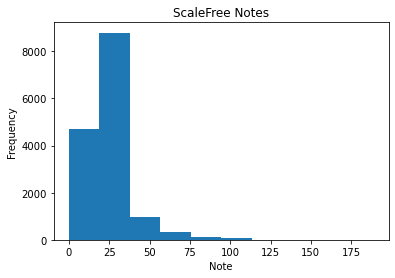

In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
c = 40
alpha = 1.1
amp = 0


alphas = np.random.uniform(0.5, 1.5, 15000)
amps = np.random.uniform(150, 200, 50)


def midiRange(c, alpha, amp):
    lamp = np.log10(amp)
    return  abs((c/alpha)*lamp)


midis = midiRange(c, 1.10, amplitudes)
plt.hist(midis)
print(midis)

plt.title('ScaleFree Notes')
plt.xlabel('Note')
plt.ylabel('Frequency')


In [67]:
midi = midiRange(40,1.10,mean_amp)
print(midi)

42.07036337832729


[[72.        ]
 [66.98403538]
 [68.1779215 ]
 ...
 [67.51532795]
 [68.1779215 ]
 [66.98403538]]


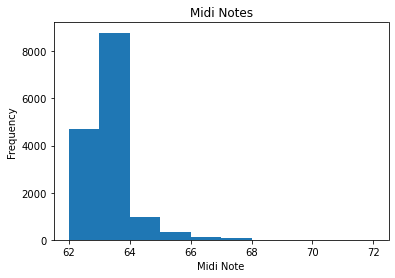

In [78]:


def midiNums(arr, mode):
    midis_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler(feature_range=(int(mode[0]), int(mode[-1])))
    scaler = scaler.fit(midis_arr)
    midis_scaled = scaler.transform(midis_arr)
    return midis_scaled

# Checking reconstruction
#X_rec = scaler.inverse_transform(X_scaled)
scaled = midiNums(midis, mode)
plt.hist(scaled)
plt.title('Midi Notes')
plt.xlabel('Midi Note')
plt.ylabel('Frequency')
print(scaled)

Text(0, 0.5, 'Frequency')

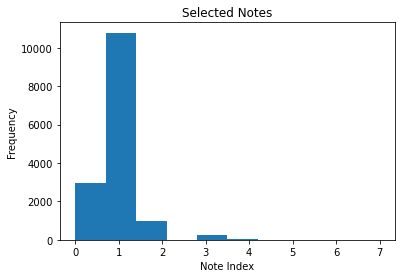

In [104]:
def getNote(mode, midi_scaled):
    
    #midis_arr = arr.reshape(-1, 1)
    #scaler = preprocessing.StandardScaler().fit(X_train)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 7))
    scaler = scaler.fit(midi_scaled)
    note_index = scaler.transform(midi_scaled)
    rounded = np.round(note_index)
    return rounded
    


notes = getNote(mode, scaled)
#plt.scatter(x = np.arange(50), y = notes)
plt.hist(notes)
plt.title('Selected Notes')
plt.xlabel('Note Index')
plt.ylabel('Frequency')




         0
0.0   2936
1.0  10783
2.0    964
3.0    246
4.0     64
5.0      6
7.0      1


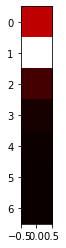

In [120]:

unique, counts = np.unique(notes, return_counts=True)
notefreq = pd.DataFrame(counts, unique)


print(notefreq)
plt.imshow(notefreq, cmap='hot', interpolation='nearest')
plt.show()